# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    try:
        # Group cities in sets of 50 for logging purposes
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 0

        # Create endpoint URL with each city
        response = requests.get(query_url + city).json()

        city_weather_dict = {
            "city": city,
            "latitude": response["coord"]["lat"],
            "longitude": response["coord"]["lon"],
            "max temp": response["main"]["temp_max"],
            "city humidity": response["main"]["humidity"],
            "cloudiness": response["clouds"]["all"],
            "wind speed": response["wind"]["speed"],
            "country": response["sys"]["country"],
            "date": response["dt"]
        }

        # Append city weather info to the city_data list
        city_data.append(city_weather_dict)

        # Log the processing of each city
        print(f"Processing Record {i+1} | {city}")

    except Exception as e:
        print(f"Error processing {city}: {e}")
        print("City not found. Skipping...")

# Convert the cities weather dictionary into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

Processing Record 1 | longboat key
Processing Record 2 | qacha's nek
Processing Record 3 | invercargill
Processing Record 4 | puerto ayora
Processing Record 5 | petropavlovsk-kamchatsky
Error processing tranovaho: 'coord'
City not found. Skipping...
Processing Record 7 | ivatsevichy
Processing Record 8 | san patricio
Processing Record 9 | bethel
Processing Record 10 | lock haven
Processing Record 11 | taoudenni
Processing Record 12 | puerto natales
Processing Record 13 | waitangi
Processing Record 14 | olonkinbyen
Processing Record 15 | aykhal
Processing Record 16 | ust-nera
Processing Record 17 | qaqortoq
Processing Record 18 | stanley
Processing Record 19 | tralee
Processing Record 20 | enewetak
Processing Record 21 | port-aux-francais
Processing Record 22 | utrik
Processing Record 23 | craig
Processing Record 24 | lihue
Processing Record 25 | hawaiian paradise park
Processing Record 26 | grytviken
Processing Record 27 | revda
Processing Record 28 | yellowknife
Processing Record 29 |

In [6]:
# Log the processing of each city
print(f"Processing Record {i+1} | {city}")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 599 | kozhevnikovo
-----------------------------
Data Retrieval Complete
-----------------------------


In [7]:
# Display sample data
city_data_df

,city,latitude,longitude,max temp,city humidity,cloudiness,wind speed,country,date
0,longboat key,27.4125,-82.6590,77.23,54,0,9.22,US,1710283181
1,qacha's nek,-30.1154,28.6894,58.60,67,100,1.74,LS,1710283620
2,invercargill,-46.4000,168.3500,53.02,79,97,8.01,NZ,1710283620
3,puerto ayora,-0.7393,-90.3518,84.16,98,85,3.00,EC,1710283369
4,petropavlovsk-kamchatsky,53.0452,158.6483,14.59,57,0,6.71,RU,1710283621
...,...,...,...,...,...,...,...,...,...
562,ugoofaaru,5.6667,73.0000,81.68,74,6,2.42,MV,1710283775
563,darabani,48.1833,26.5833,39.70,92,100,9.60,RO,1710283775
564,sinabang,2.4803,96.3801,79.61,77,73,1.68,ID,1710283776
565,pul-e khumri,35.9446,68.7151,41.90,93,100,5.17,AF,1710283776


In [ ]:
import os

# Define the directory path
output_dir = "WeatherPy/output_data"

# Save the DataFrame to a CSV file
city_data_df.to_csv(os.path.join(output_dir, "my_cities.csv"), index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/my_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,city,latitude,longitude,max temp,city humidity,cloudiness,wind speed,country,date
City_ID,,,,,,,,,
0,forster,-32.1667,152.5167,81.37,58,20,5.66,AU,1710200888
1,blackmans bay,-43.0167,147.3167,63.52,69,74,1.99,AU,1710200888
2,oak grove,45.4168,-122.6401,48.94,89,100,9.22,US,1710200350
3,grytviken,-54.2811,-36.5092,42.31,81,43,7.70,GS,1710200888
4,hamilton,39.1834,-84.5333,56.25,37,0,12.66,US,1710200889


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

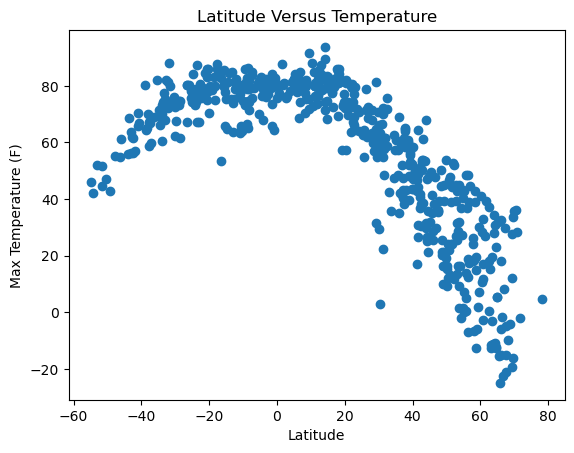

In [16]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['latitude']
y_values = city_data_df['max temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude Versus Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

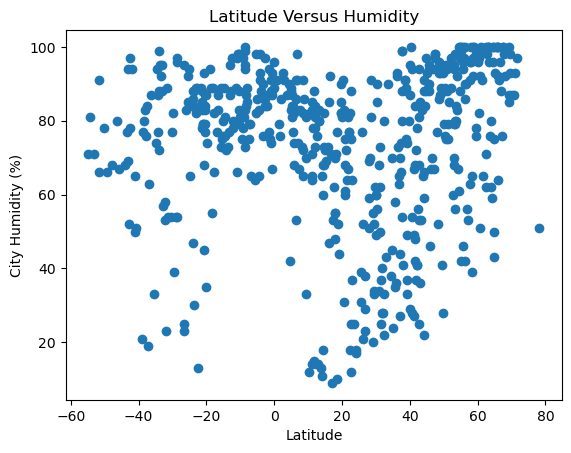

<Figure size 640x480 with 0 Axes>

In [22]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['latitude']
y_values = city_data_df['city humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('City Humidity (%)')
plt.title("Latitude Versus Humidity")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

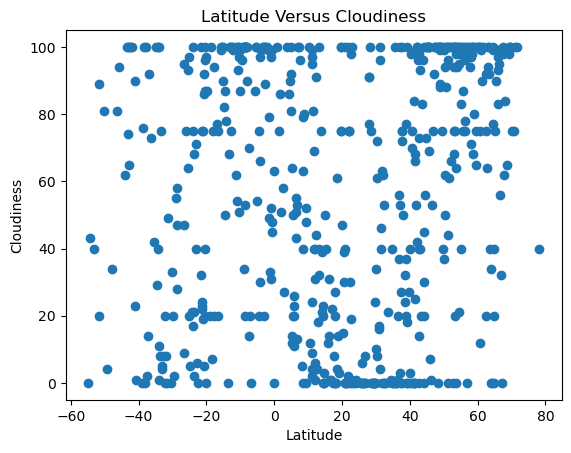

<Figure size 640x480 with 0 Axes>

In [23]:
# Build the scatter plot for latitude vs. cloudiness
x_values = city_data_df['latitude']
y_values = city_data_df['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Versus Cloudiness")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

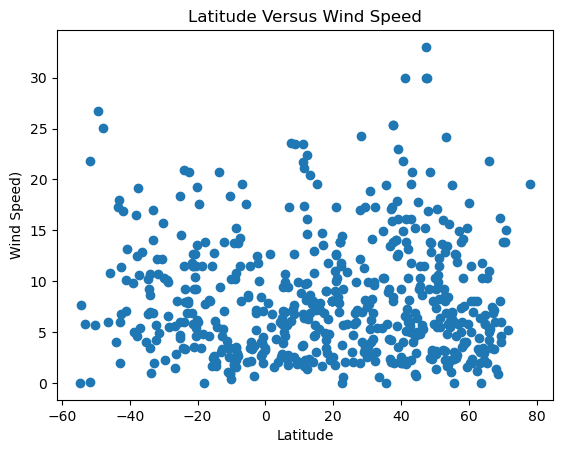

<Figure size 640x480 with 0 Axes>

In [24]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['latitude']
y_values = city_data_df['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed)')
plt.title("Latitude Versus Wind Speed")


# Show plot
plt.show()
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


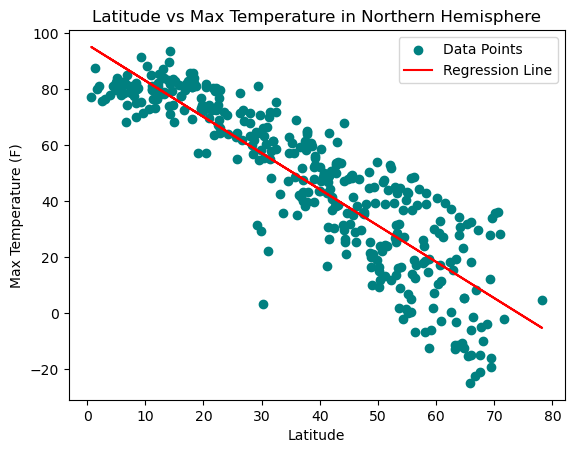

In [49]:
# Define Northern and Southern Hemispheres
northern_hem = city_data_df.loc[city_data_df['latitude'] >= 0]
southern_hem = city_data_df.loc[city_data_df['latitude'] < 0]

# Regress latitude and max temp for Northern Hemisphere
x_values = northern_hem['latitude']
y_values = northern_hem['max temp']
(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)

# Get regression values 
regress_values = x_values * slope +intercept

# Plot the scatter plot
plt.scatter(x_values, y_values, color='teal', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs Max Temperature in Northern Hemisphere')
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE